# Analisi Esplorativa - Dataset LGG TCGA
Questo notebook analizza il file `data.csv` contenente:
- Cluster genomici (RNAseq, Methylation, etc.)
- Dati clinici (tipo istologico, grado, etc.)
- Outcome (morte)

### Import librerie di base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Configurazione visualizzazione
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

### Caricamento dati

In [6]:
df = pd.read_csv('../data/data.csv')
print(f"Dimensioni dataset: {df.shape}")
df.head()

Dimensioni dataset: (110, 18)


,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [ ]:
# Informazioni sul dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [10]:
# Statistiche descrittive delle feature numeriche
df.describe()

,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
count,92.000000,109.000000,110.000000,108.000000,98.000000,105.000000,110.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.000000,108.000000,102.000000,109.000000
mean,2.445652,3.678899,1.900000,1.722222,2.367347,1.895238,1.763636,2.128440,1.532110,1.0,2.009174,3.513761,1.486239,45.834862,2.907407,1.970588,0.247706
std,1.180092,1.169684,0.789263,0.862872,1.125045,0.663960,0.855927,0.850935,0.501273,0.0,0.995317,1.863960,0.502119,13.797151,0.291212,0.169792,0.433674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,20.000000,2.000000,1.000000,0.000000
25%,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,1.000000,34.000000,3.000000,2.000000,0.000000
50%,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.0,2.000000,2.000000,1.000000,47.000000,3.000000,2.000000,0.000000
75%,4.000000,5.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.0,3.000000,6.000000,2.000000,58.000000,3.000000,2.000000,0.000000
max,4.000000,5.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,1.0,3.000000,6.000000,2.000000,75.000000,3.000000,2.000000,1.000000


In [11]:
# Valori mancanti per ciascuna colonna
df.isnull().sum()

Patient                       0
RNASeqCluster                18
MethylationCluster            1
miRNACluster                  0
CNCluster                     2
RPPACluster                  12
OncosignCluster               5
COCCluster                    0
histological_type             1
neoplasm_histologic_grade     1
tumor_tissue_site             1
laterality                    1
tumor_location                1
gender                        1
age_at_initial_pathologic     1
race                          2
ethnicity                     8
death01                       1
dtype: int64

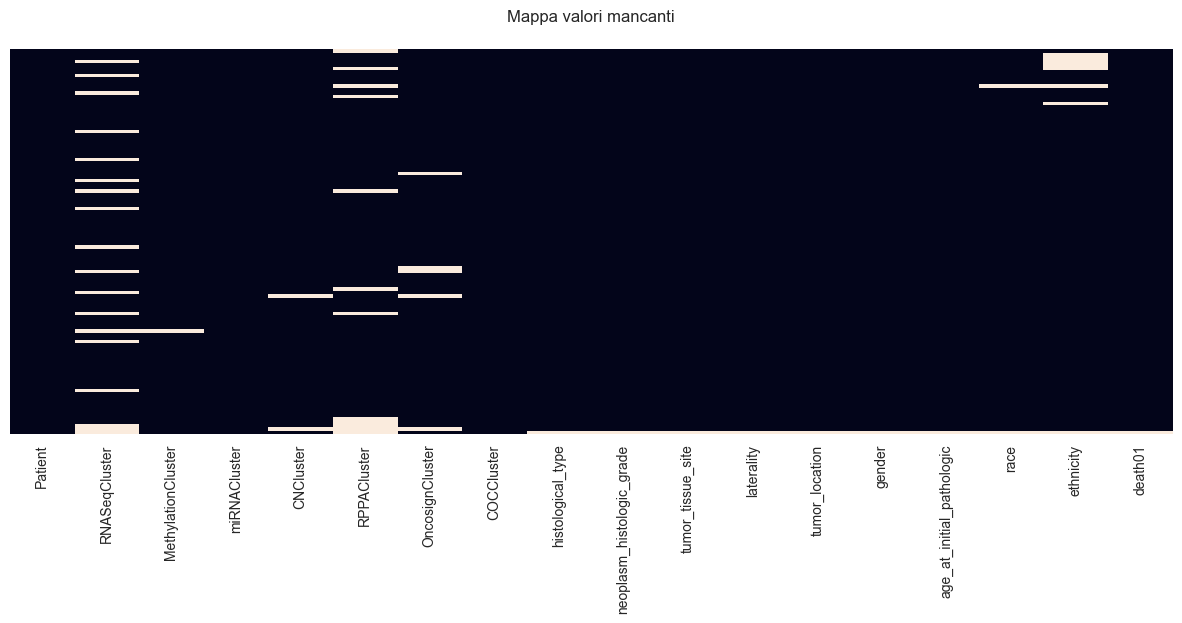

In [7]:
# Analisi campioni mancanti
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Mappa valori mancanti', pad=20)
plt.show()

### Analisi variabili cliniche chiave

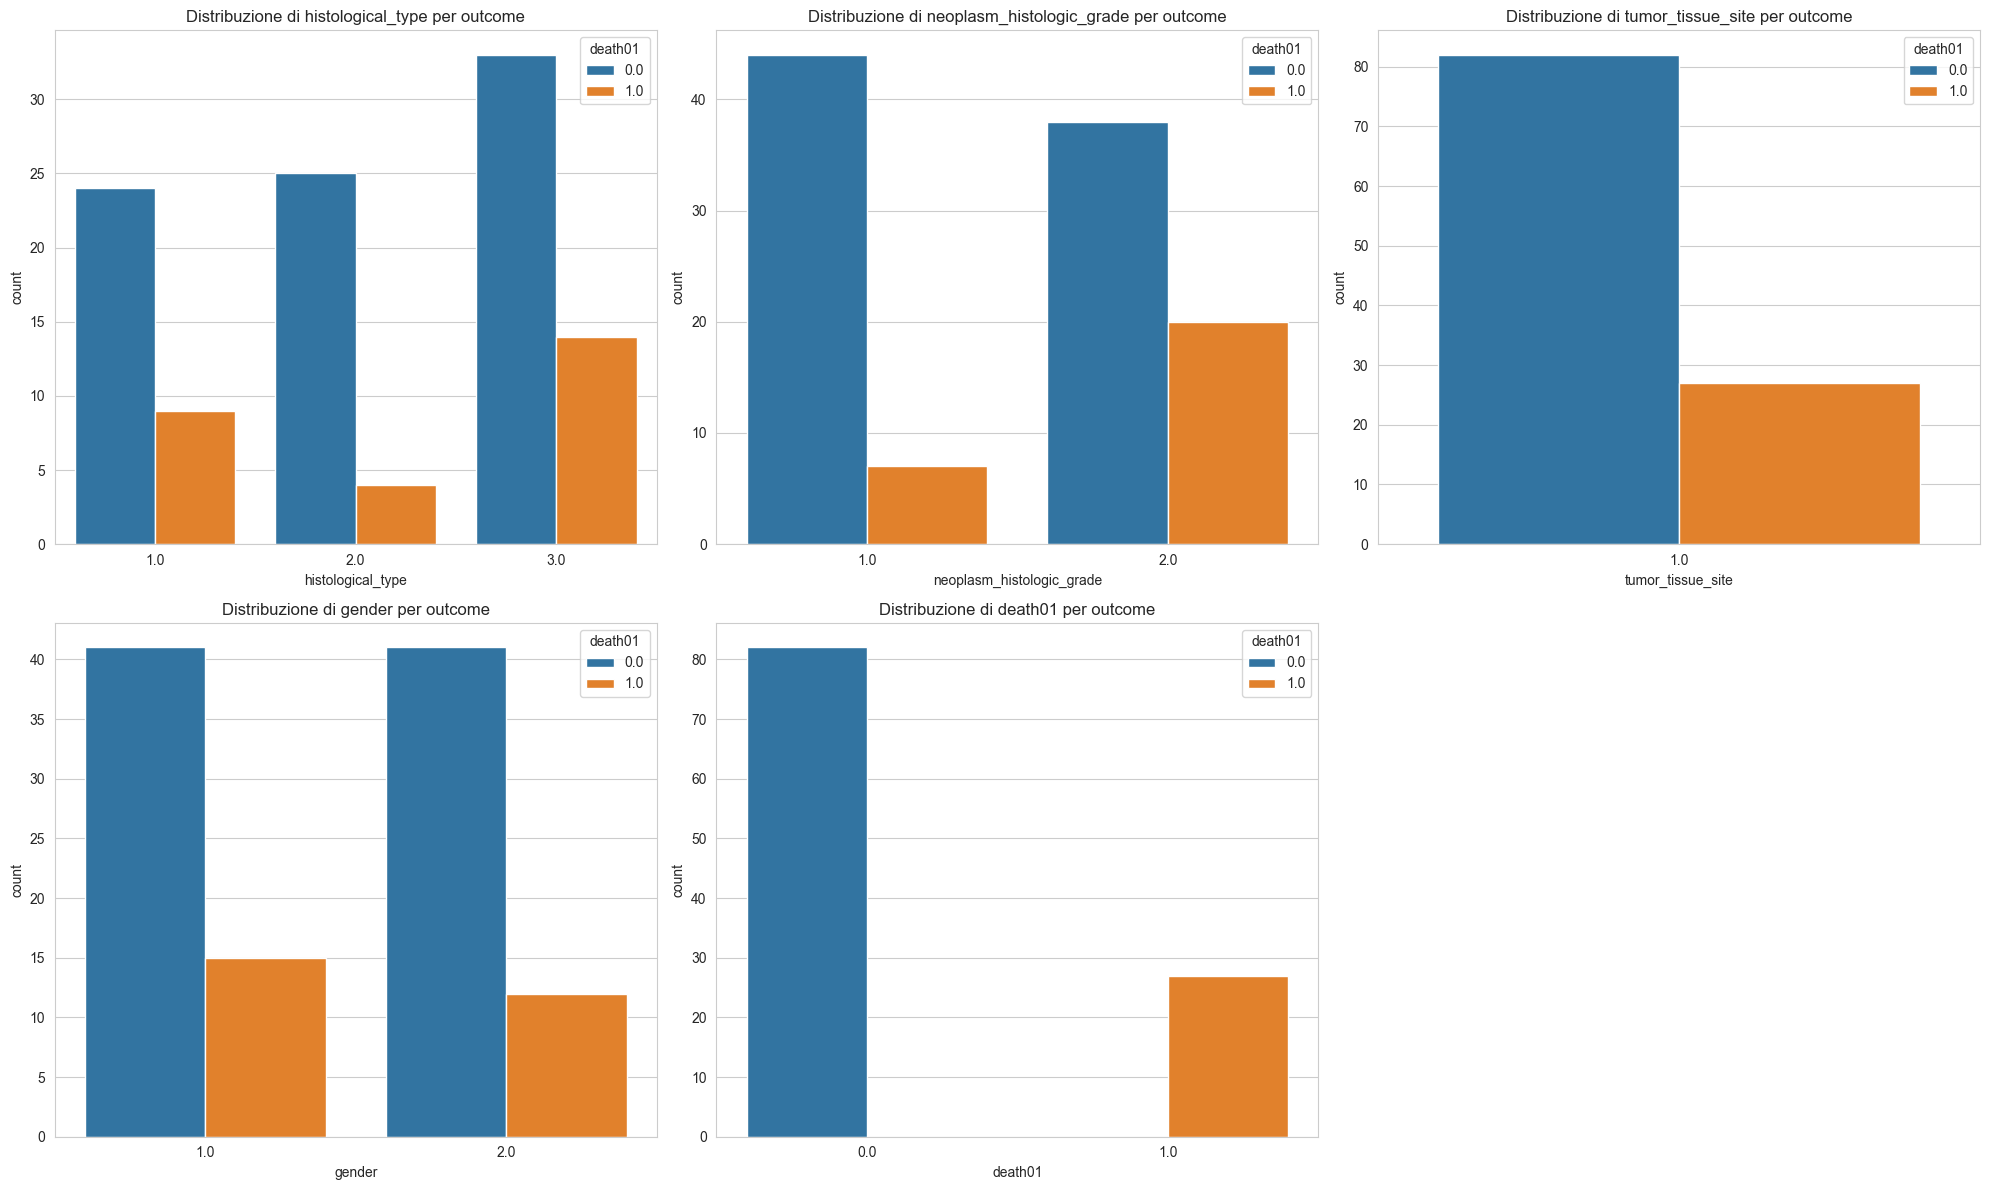

In [12]:
clin_vars = [
    'histological_type', 
    'neoplasm_histologic_grade', 
    'tumor_tissue_site', 
    'gender', 
    'death01',
]

plt.figure(figsize=(20, 12))
for i, var in enumerate(clin_vars, 1):
    plt.subplot(2, 3, i)
    if df[var].nunique() < 5:
        sns.countplot(data=df, x=var, hue='death01')
    else:
        sns.histplot(data=df, x=var, hue='death01', kde=True)
    plt.title(f'Distribuzione di {var} per outcome')
plt.tight_layout()
plt.show()

### Analisi cluster genomici

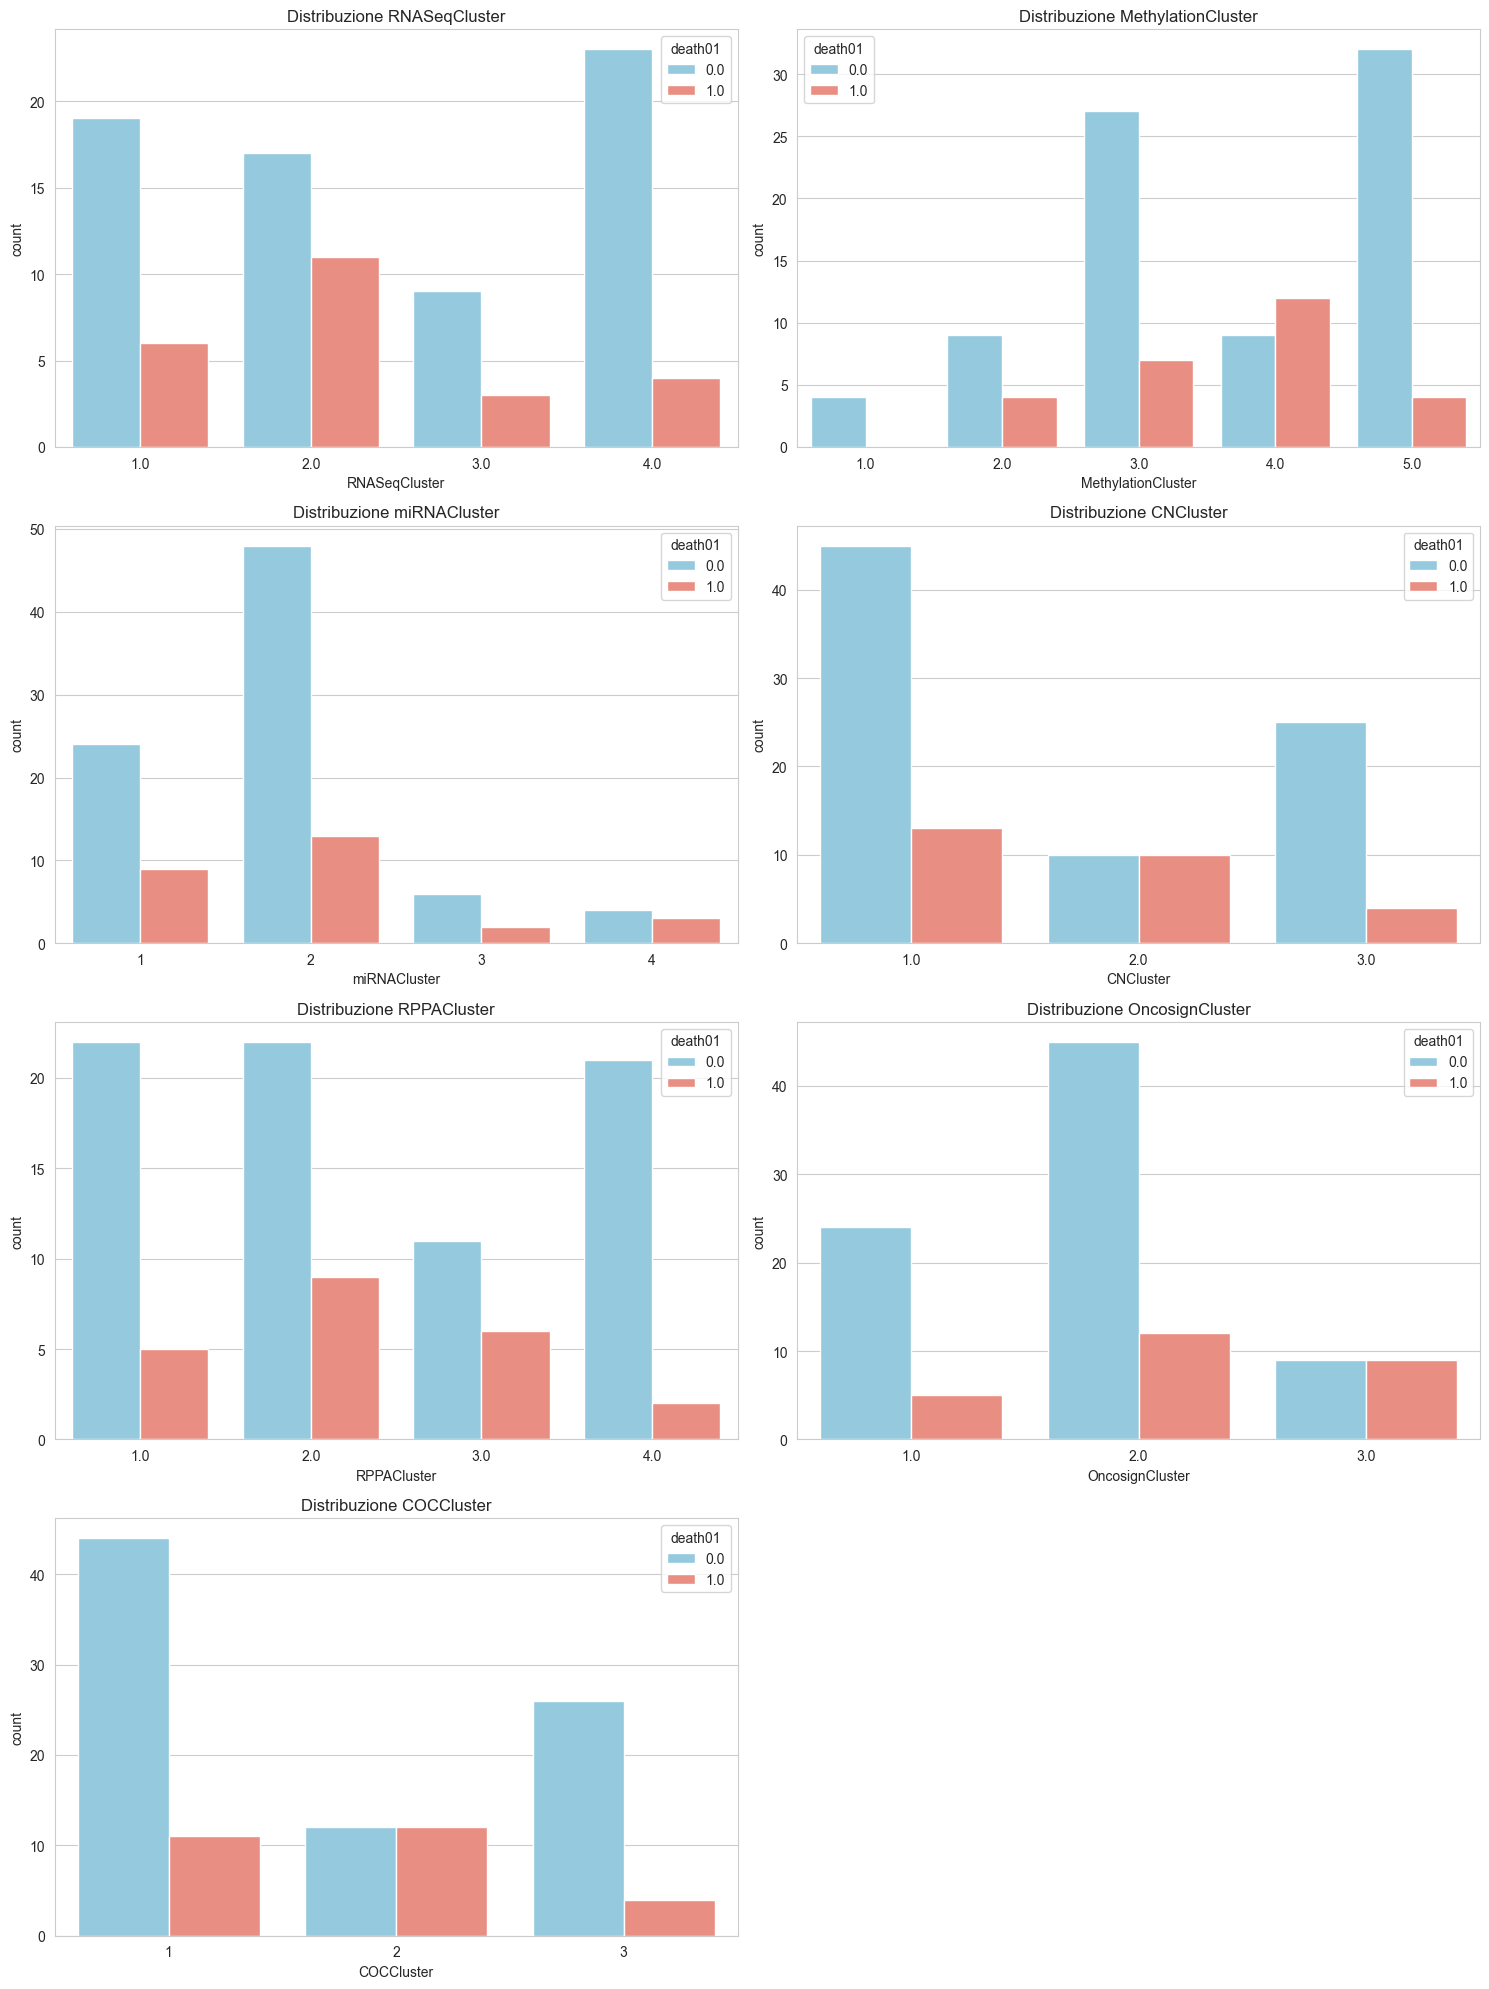

In [ ]:
genomic_clusters = [
    'RNASeqCluster', 
    'MethylationCluster', 
    'miRNACluster',
    'CNCluster', 
    'RPPACluster', 
    'OncosignCluster', 
    'COCCluster',
]

plt.figure(figsize=(15, 20))
for i, cluster in enumerate(genomic_clusters, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=cluster, hue='death01', 
                 palette={0: 'skyblue', 1: 'salmon'})
    plt.title(f'Distribuzione {cluster}')
plt.tight_layout()
plt.show()

### Correlazione tra variabili numeriche

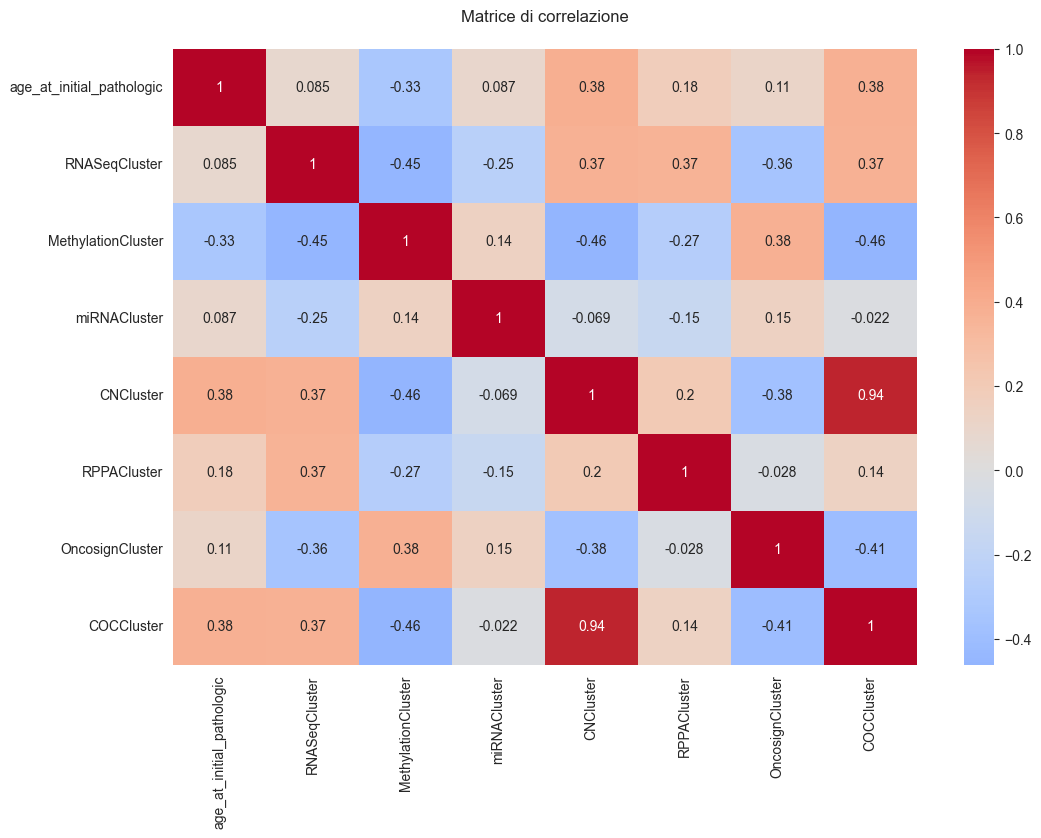

In [14]:
num_vars = ['age_at_initial_pathologic'] + genomic_clusters
num_df = df[num_vars].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di correlazione', pad=20)
plt.show()

### Analisi sopravvivenza per cluster

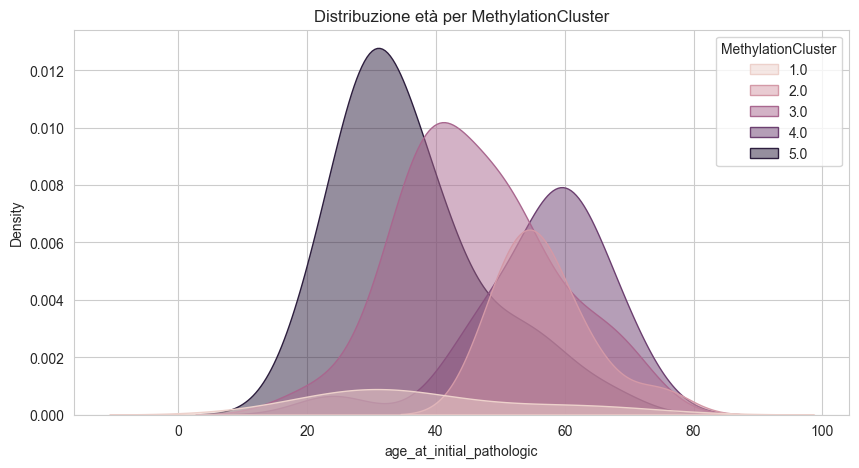

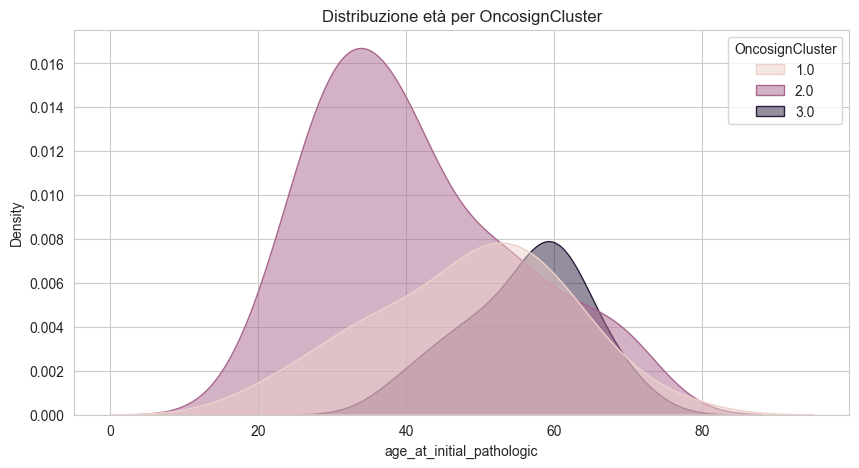

In [15]:
significant_clusters = [
    'MethylationCluster', 
    'OncosignCluster',
]  # Da verificare

for cluster in significant_clusters:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x='age_at_initial_pathologic', 
                hue=cluster, fill=True, alpha=0.5)
    plt.title(f'Distribuzione età per {cluster}')
    plt.show()

### Feature engineering preliminare

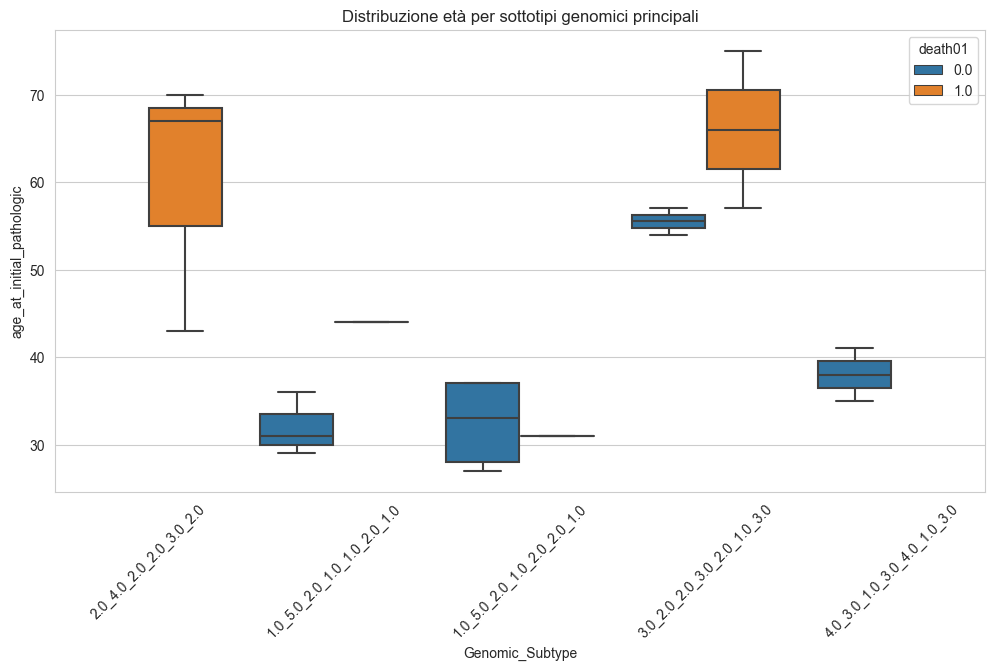

In [16]:
# Creazione variabile combinata cluster
df['Genomic_Subtype'] = df[genomic_clusters].apply(
    lambda x: '_'.join(x.dropna().astype(str)), axis=1)

# Analisi sottotipi più comuni
top_subtypes = df['Genomic_Subtype'].value_counts().nlargest(5).index
df_sub = df[df['Genomic_Subtype'].isin(top_subtypes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sub, x='Genomic_Subtype', 
            y='age_at_initial_pathologic', hue='death01')
plt.title('Distribuzione età per sottotipi genomici principali')
plt.xticks(rotation=45)
plt.show()

-----------------------